# Programming for Data Analysis - ATU 2022/23

# Project 2

# David Higgins - G00411302

In [1]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import Perceptron
from sklearn import svm
from sklearn import tree
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math
import scipy.stats as ss

## History of the Wisconsin breast cancer dataset



This dataset is one of a pair created from data collected by Dr. William Wolberg at the University of Wisconsin Hospitals over an almost 3 year time period, from January 1989 to November 1991. The first dataset, known as the original, was the amalgamation of 8 separate groups of data submitted by Dr. Wolberg to the researchers. Each instance contained 11 attributes; an ID number, nine characteristics of the tissue sample and a classification of malignant or benigh. There are 669 instances in total in this dataset. 

The second dataset, known as the diagnostic, will be the subject of this project. This dataset contains the ID number and benign/malignant classification, as well as 10 characteristics of images taken of the samples. The characteristics are digital representations of cell nuclei seen in images taken of a fine needle aspirate (FNA) of a breast mass. The characteristics are defined using a curve fitting algorithm. The mean, standard error and worst/largest values are calculated for each of the 10 characteristics, giving a total of 32 attributes. This dataset holds 569 instances, with 357 classified as benign and 212 classified as malignant. The 10 characteristics reported are given by the UCI Machine Learning Repository as:

a) radius (mean of distances from center to points on the perimeter)  
b) texture (standard deviation of gray-scale values)  
c) perimeter  
d) area  
e) smoothness (local variation in radius lengths)  
f) compactness (perimeter^2 / area - 1.0)  
g) concavity (severity of concave portions of the contour)  
h) concave points (number of concave portions of the contour)  
i) symmetry  
j) fractal dimension ("coastline approximation" - 1)  

It is considered an unbalanced dataset as one class accounts for a significant majority of samples. 357 benign samples are included in contrast to 212 malignant samples. This imbalance can cause issues for certain algorithms and must be taken into account when preparing an algorithm.

## Literature Review

Agarap (2018) tested 6 different machine learning algorithms on this dataset. The algorithms used were:

1. GRU-SVM
2. Linear Regression
3. Multilayer Perceptron (MLP)
4. Nearest Neighbour (NN) search
5. Softmax Regression
6. Support Vector Machine (SVM)

All 6 algorithms performed favourably, scoring over 90% accuracy on classifying the samples as benign or malignant. Agarap proposed using a neural network architecture using the  gated  recurrent  unit  (GRU)  variant  of  recurrent neural  network  (RNN)  and  the  support  vector  machine  (SVM),  for the purpose of binary classification. The remaining 5 algorithms were existing algorithms used as a comparison to the author's proposed system.

Using a 70/30 train/test split, the following classification accuracy results were achieved:

1. GRU-SVM - 93.75%
2. Linear Regression - 96.09%
3. Multilayer Perceptron (MLP) - 99.04%
4. Nearest Neighbour (NN) search - L1-NN 93.57% L2-NN 94.74%
5. Softmax Regression - 97.66%
6. Support Vector Machine (SVM) - 96.09%

Agarap's algorithm compares very well with the established algorithms. The Multilayer Perceptron algorithm performed exceptionally well at 99.04%. A stronger result was obtained by Umami and Sarno (2020) using a Generalized Linear Model. This study compared the performance of 3 different algorithms on the Wisconsin diagnostic dataset:

1. Generalized Linear Model
2. Logistic Regression
3. Gradient Boosted Decision Tree

This research found the Generalized Linear Model outperformed all other studies noted in that paper, with an accuracy score of 99.4%.

Borges (2015) carried out a study that contrasted Bayesian Networks and the J48 algorithm. One of the objectives was to minimise false-negative results and a discretization ﬁlter with the equal frequency mode was found to be the best way to do this. The Bayesian Networks returned an accuracy of 97.8%, while the J48 had an accuracy of 96.05%. Borges indicated that the J48 algorithm was expected to perform worse than the Bayesian Networks as it is a tree algorithm. Tree algorithms perform poorer when dealing with unbalanced datasets.

## Summary statistics

We can now begin to examine the dataset itself. The dataset is available from a wide range of sources. For the purposes of this investigation we will load it from the scikit-learn package. When the data is loaded what is actually returned is a Bunch object. This is a collection of objects including a pandas dataframe with the data, a pandas data series containing the target data, lists of attributes and a text description.

In [2]:
#as_frame option generates a pandas dataframe
data = load_breast_cancer(return_X_y=False, as_frame=True) 

In [3]:
type(data)

sklearn.utils.Bunch

In [4]:
#data is a Bunch object. We use .frame method to call the actual dataframe
df = data.frame

In [5]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [6]:
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


## Correlation within the dataset

We can use heatmaps to get an understanding of how the variables are correlated. This will be helpful when generating synthetic data as it will give us an idea if our generated data resembles the relationships of the original dataset.

<AxesSubplot:>

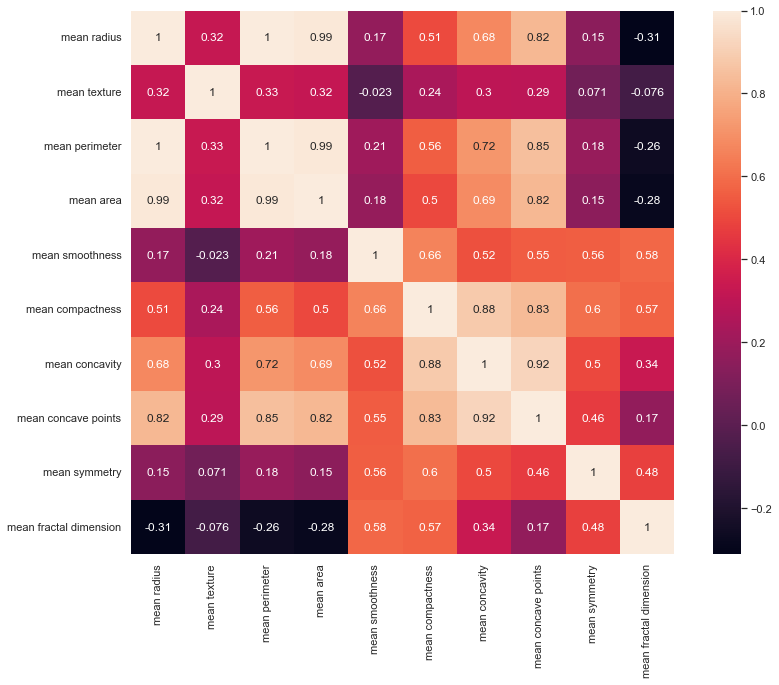

In [7]:
#https://www.kaggle.com/code/djokester/visualising-the-breast-cancer-wisconsin-data-set/notebook
sns.set(rc={'figure.figsize':(14,10)})
sns.heatmap(df.iloc[:,0:10].corr(), vmax=1, square=True, annot=True)

<AxesSubplot:>

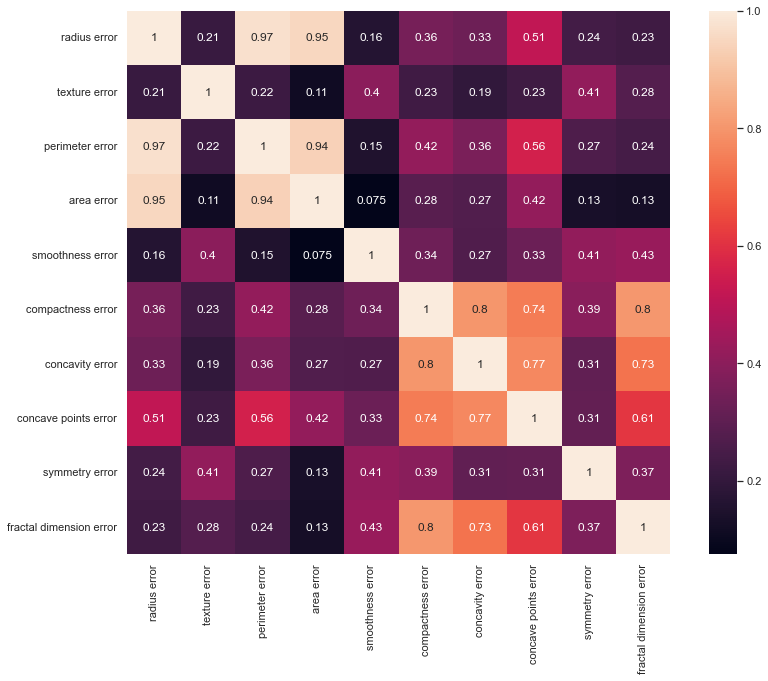

In [8]:
sns.heatmap(df.iloc[:,10:20].corr(), vmax=1, square=True, annot=True)

<AxesSubplot:>

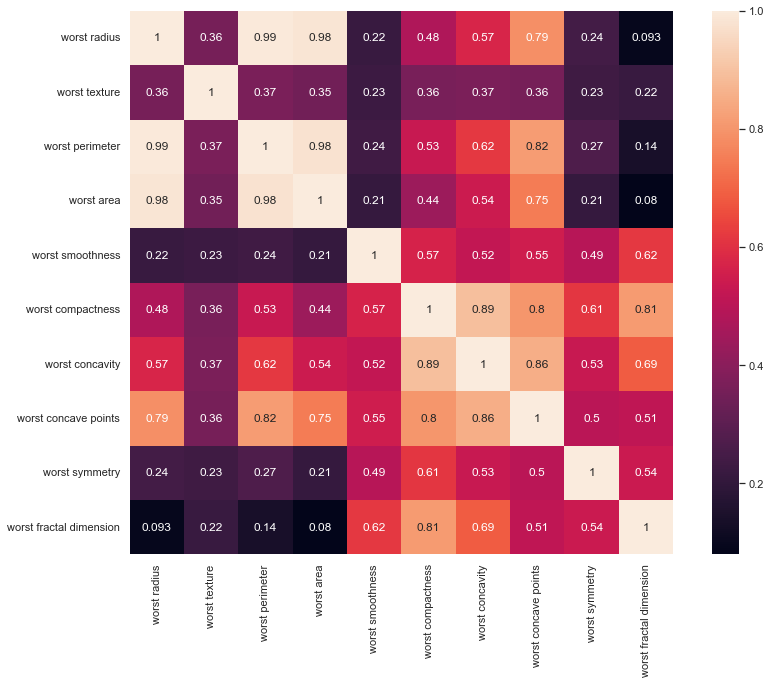

In [9]:
sns.heatmap(df.iloc[:,20:30].corr(), vmax=1, square=True, annot=True)

## Distribution of data

Next we look at the distributions of the data. This will help us develop an understanding of what distributions each variable follows. We expect most to be normally distributed but they may be some that are heavily skewed or more uniform that will require a different distribution to model.

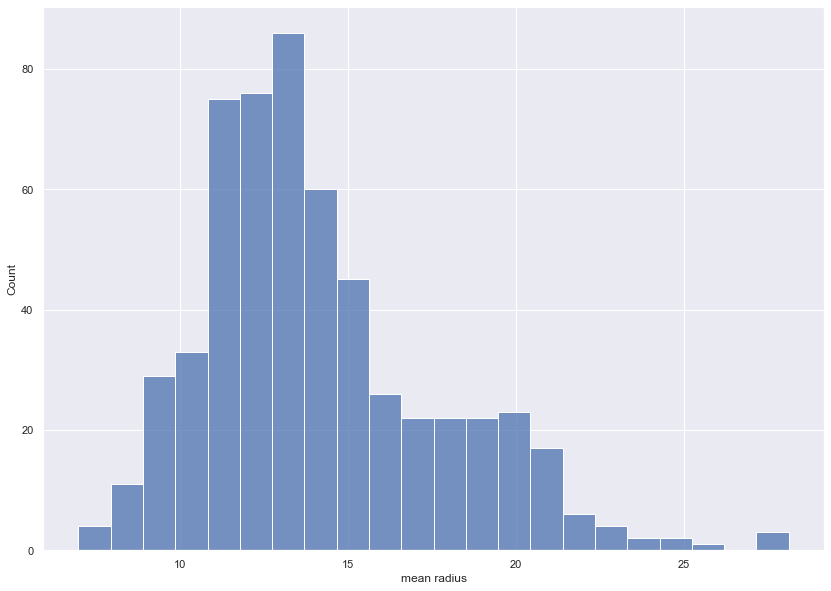

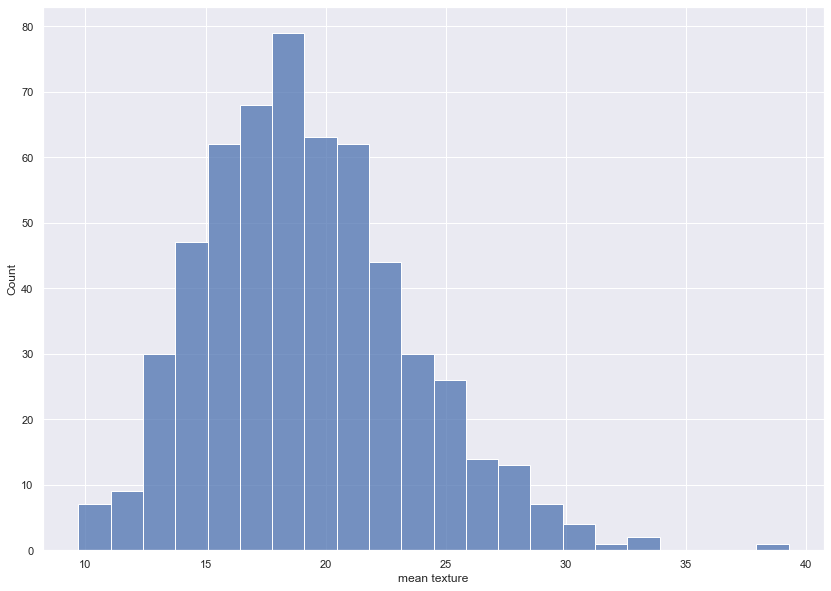

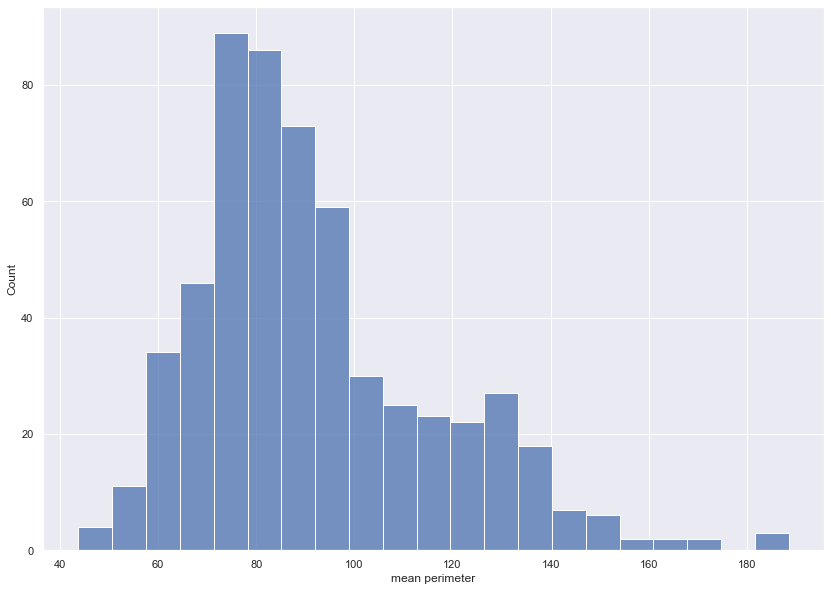

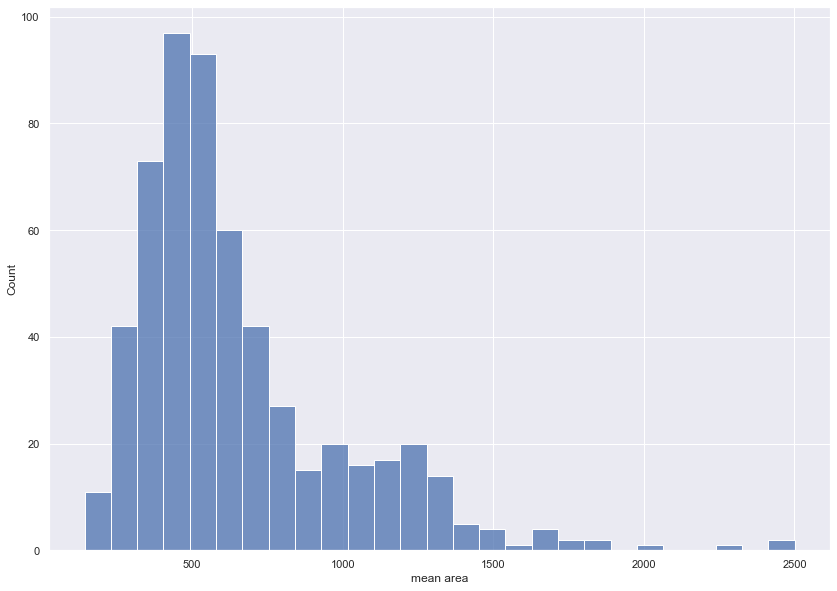

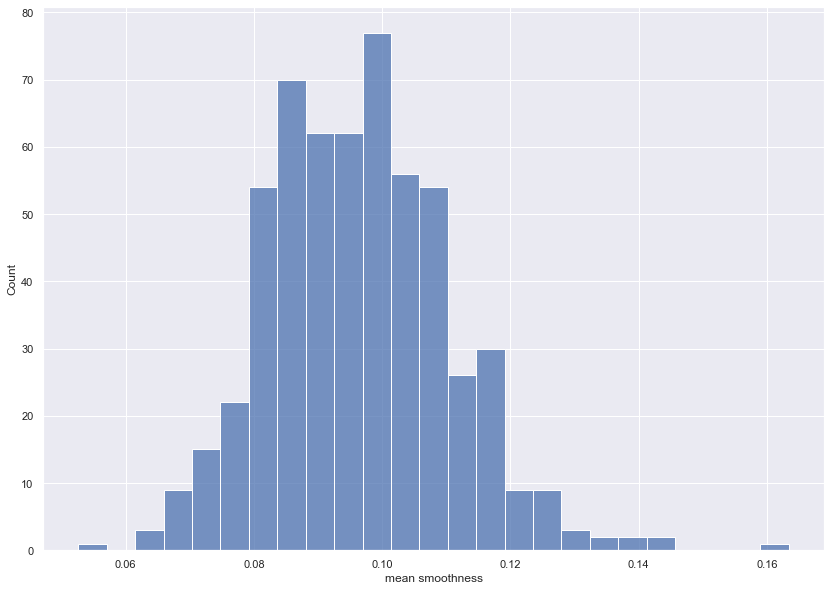

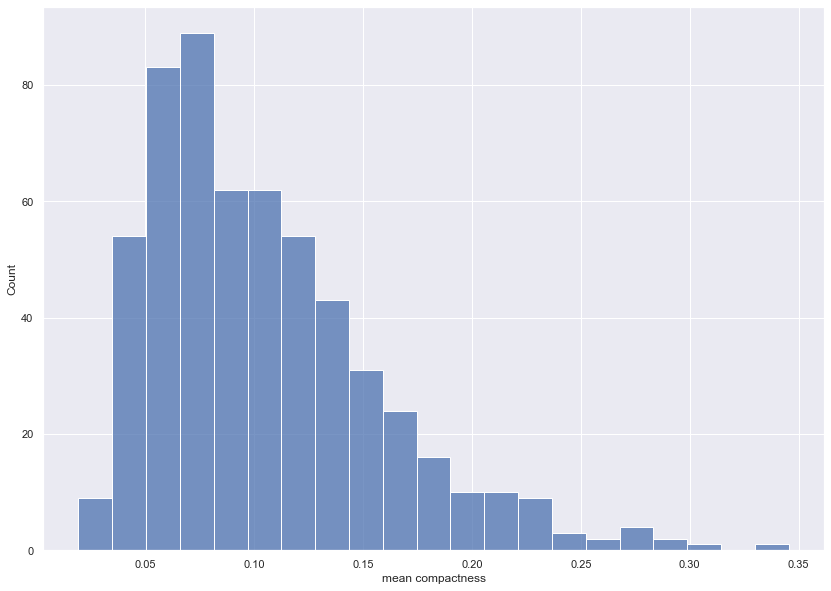

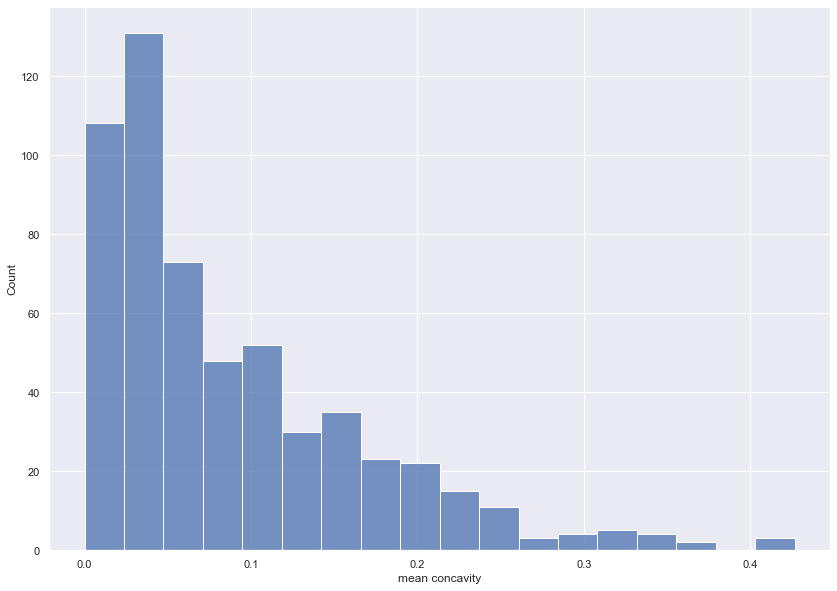

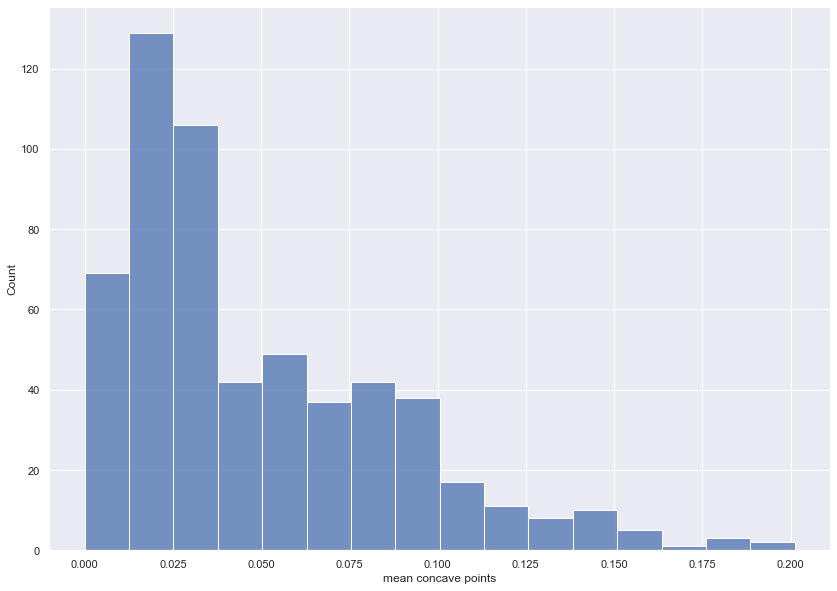

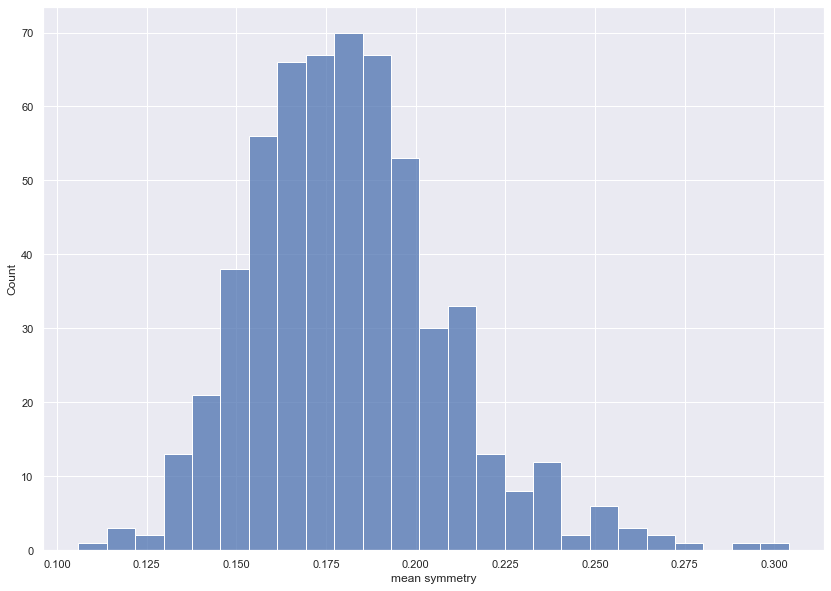

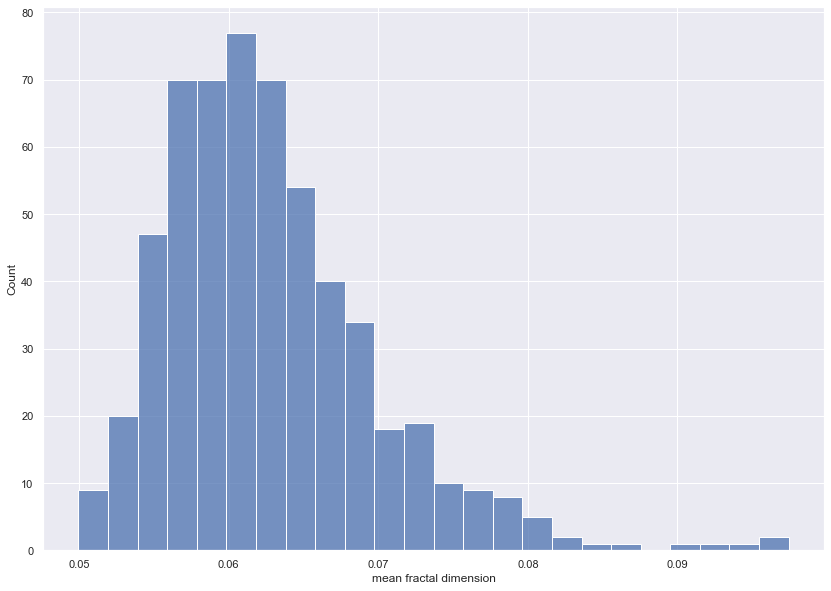

In [10]:
for i in range(0,10):
    plt.figure()
    sns.histplot(df.iloc[:,i])

While most attributes are normally distributed, if a little skewed, compactness, concavity and concave points have a much more skewed distribution. These attributes would be better modelled using a gamma distribution as they follow the same right skew shape as that distribution.

## Spread and outliers

We can now use boxplots to visualise the spread of the data and any outliers. I have included strip plots to help further illustrate how the datapoints are situated within the dataset.

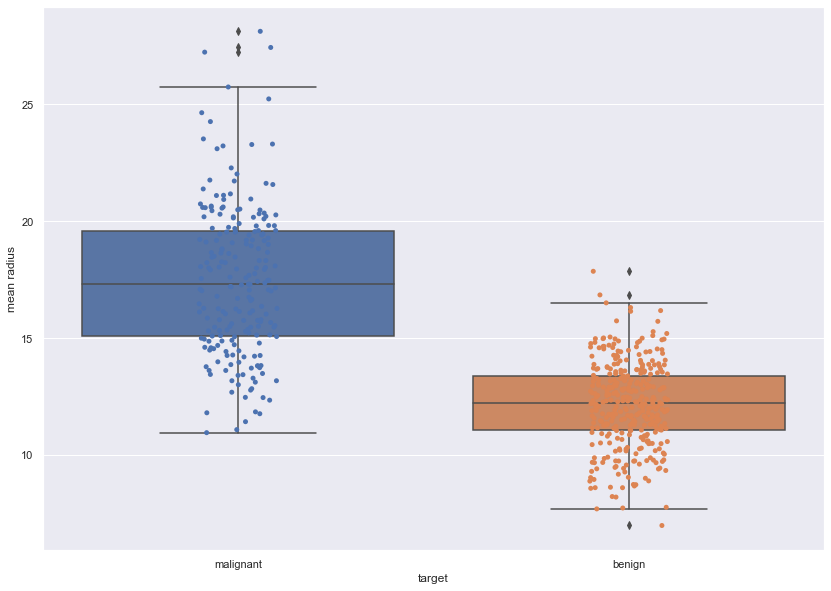

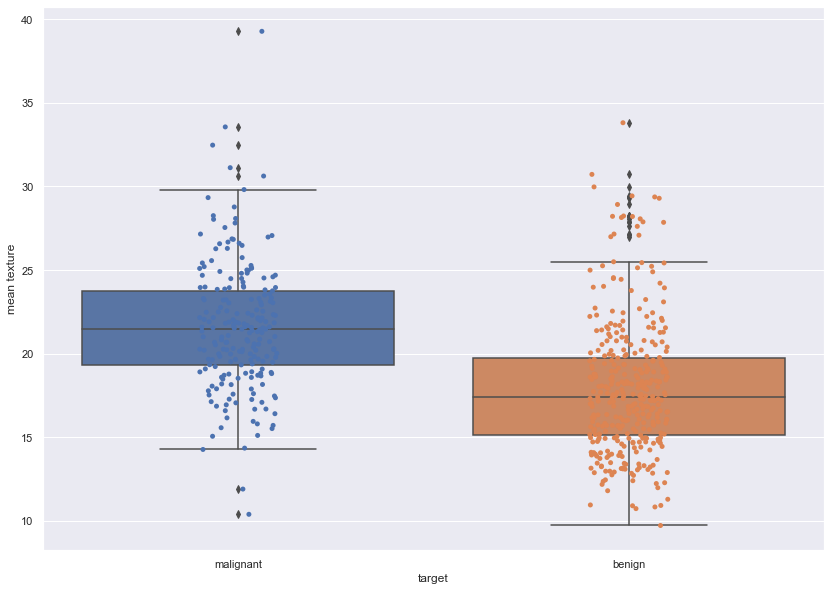

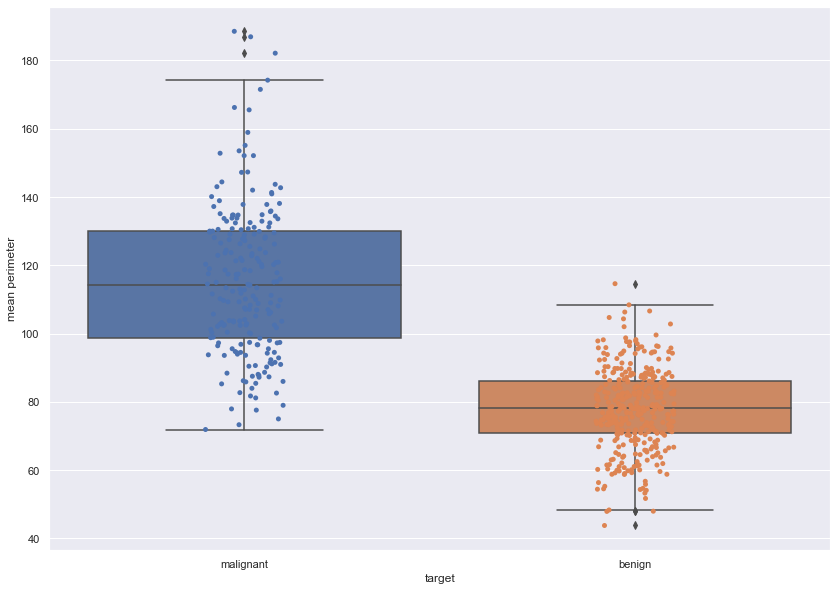

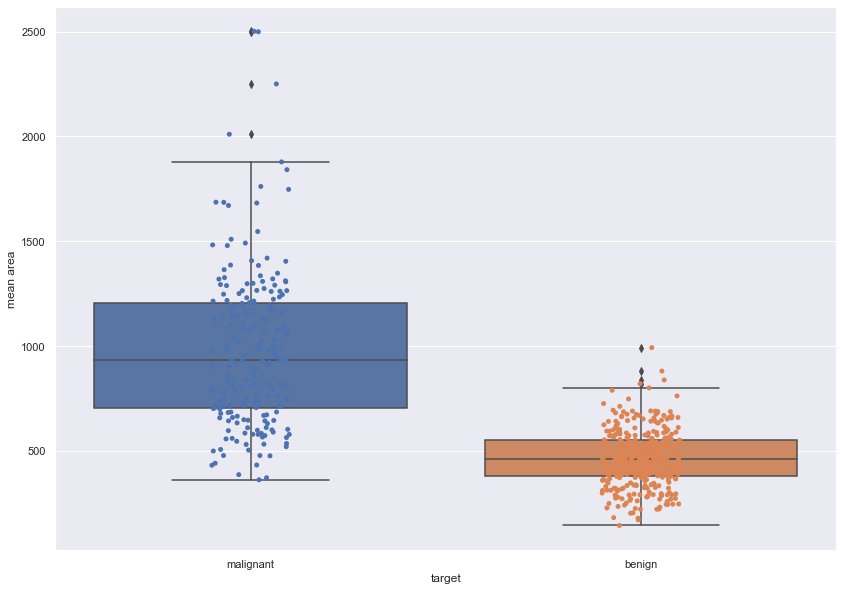

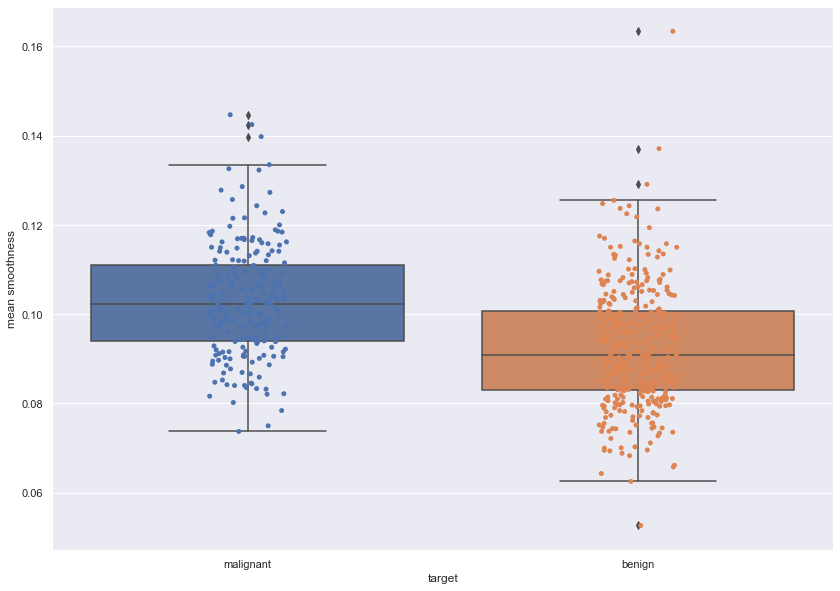

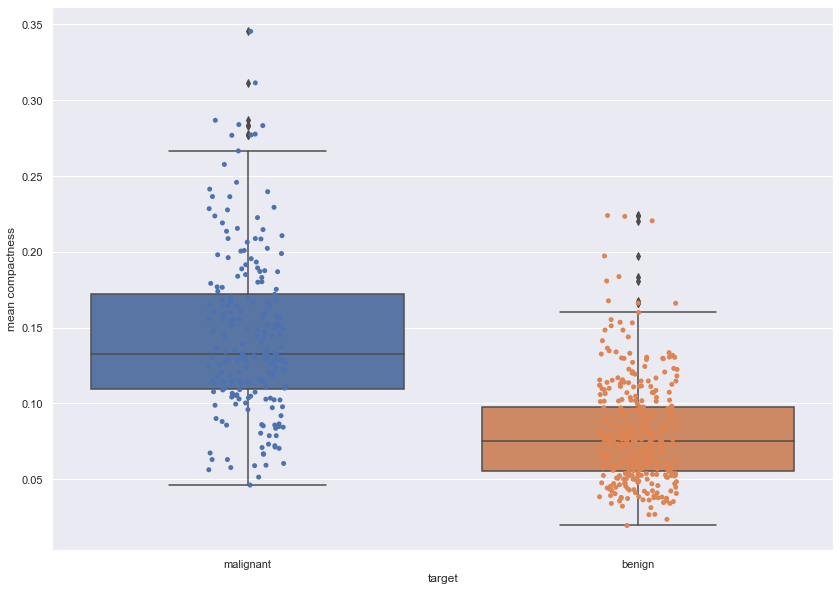

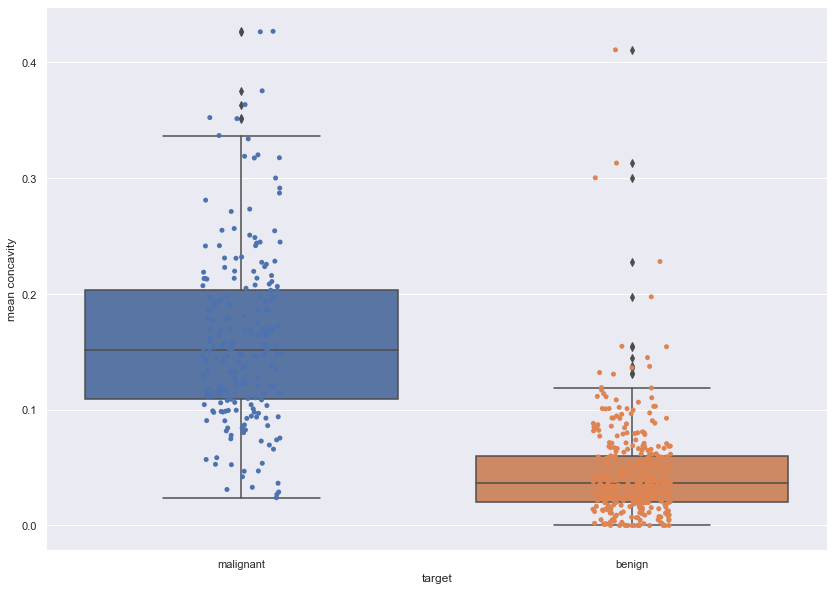

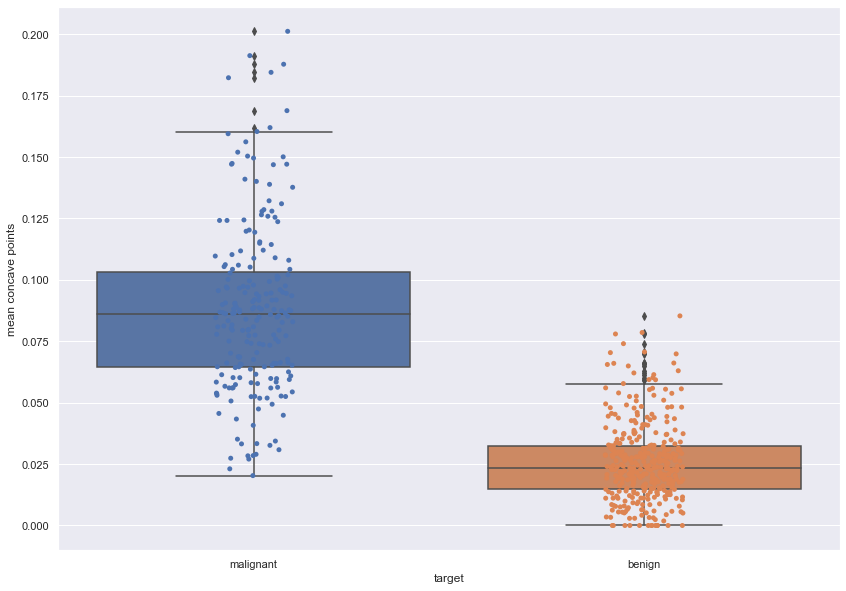

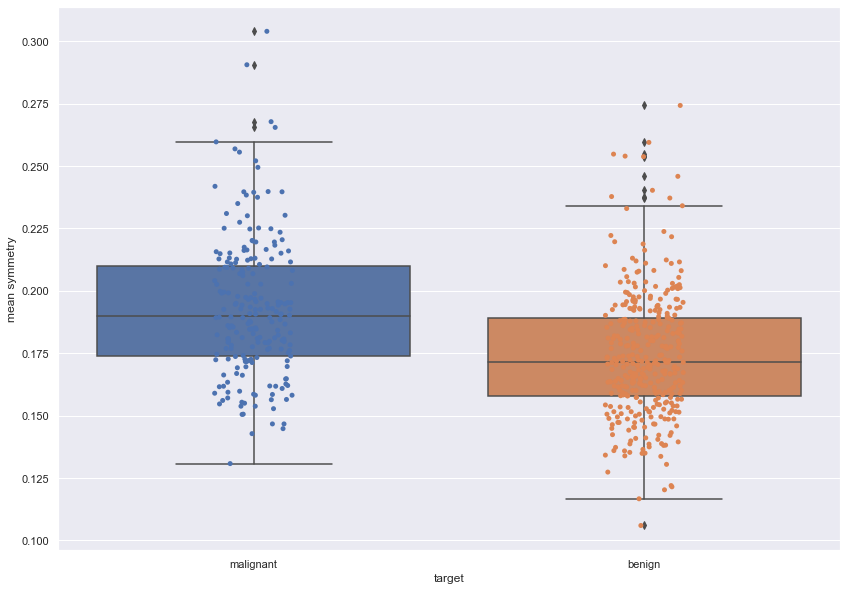

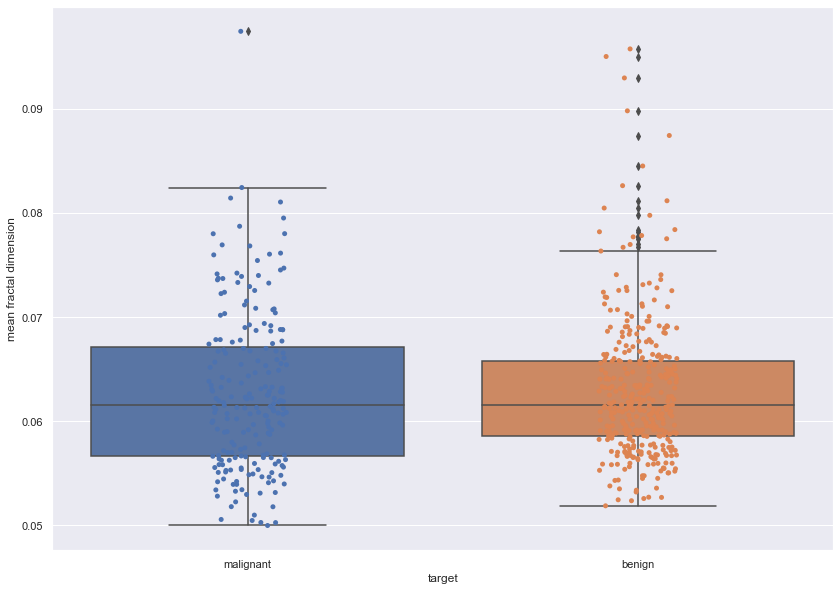

In [11]:
#https://www.kaggle.com/code/djokester/visualising-the-breast-cancer-wisconsin-data-set/notebook
for i in range(0,10):
    plt.figure()
    ax=sns.boxplot(x=df['target'],y=df.iloc[:,i])
    ax=sns.stripplot(x=df['target'],y= df.iloc[:,i],jitter=True,edgecolor='gray')
    ax.set_xticklabels(data.target_names)

It's clear that certain attributes will be more helpful in classifying tumours. Area, perimeter, concavity, concave points and radius show a marked difference between the two sets of data. Area, concavity and concave points are the best indication of whether a tumour is benign or not. The differences are so acute that the medians of the malignant set are beyond the upper whiskers of the benign boxplots. On the other hand mean fractal dimension provide very little indication of how the tumour should be classified. The medians of both sets are almost identical, as are the spreads.

## Machine learning algorithms

We will compare 4 different machine learning algorithms using the breast cancer dataset. For the purposes of this test, I have set the test/train split to 30/70. This will mirror the test/train split of the studies reviewed above and will allow for a more accurate comparison of the results. Once each algorithm is coded I will then run 100 iterations of each test to determine the average accuracy and stability. The 4 algorithms chosen are K nearest neighbours, Perceptron, Support Vector Machines and Decision Tree. 

## K Nearest Neighbours

In [12]:
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.3, train_size=0.7)

In [13]:
neigh = KNeighborsClassifier(n_neighbors=5)
neigh.fit(X_train, y_train)

KNeighborsClassifier()

In [14]:
print(neigh.predict(X_test))

[0 1 0 1 0 1 0 0 1 0 0 0 1 0 1 0 1 0 1 0 1 1 1 1 0 0 0 0 1 0 0 1 1 1 1 1 1
 0 1 1 1 1 0 1 0 0 1 1 0 1 1 1 0 1 1 0 1 0 1 0 1 0 1 1 1 1 1 0 0 0 1 0 1 0
 0 1 1 1 1 1 1 1 1 0 0 1 0 0 1 0 1 1 0 1 0 1 1 1 0 0 1 1 1 1 1 1 1 1 1 0 1
 1 1 0 0 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 0 1 0 1 0 0 1 0 1 1 1 0 1 1 1 0 1 1
 1 0 1 1 0 0 1 0 1 0 0 1 0 0 1 1 1 1 0 1 1 1 0]


In [15]:
print(np.array(y_test))

[0 1 0 1 0 1 0 0 1 0 0 0 1 0 1 0 1 0 1 0 1 1 1 1 0 0 0 0 1 0 0 1 1 1 1 1 1
 0 1 0 1 1 0 1 0 0 1 1 0 1 1 1 0 1 1 0 1 0 1 0 1 0 0 1 1 1 1 0 0 0 1 0 1 0
 0 1 1 1 1 1 1 1 1 0 0 1 0 0 0 0 1 0 0 1 0 1 1 1 0 0 1 1 1 1 1 1 1 1 1 0 0
 1 1 0 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 0 1 0 1 0 0 1 0 1 1 1 1 1 0 1 0 1 1
 1 0 1 1 0 1 1 0 1 0 0 0 0 0 1 1 1 1 0 1 1 1 0]


Next, we compare the predictions and the actual results from the dataset (y_test). By subtracting one Numpy array from the other, any differences between the arrays will show as either -1 or 1. Squaring the resulting array makes all the differences positive 1.

In [16]:
x = ((neigh.predict(X_test)-np.array(y_test))**2)
print(x)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0]


We can now count the number of errors in the predictions and the number of elements in the test dataset.

In [17]:
print('The number of errors in the predictions is {}.'.format(sum(x)))
print('The number of elements in the test dataset is {}.'.format(len(x)))

The number of errors in the predictions is 11.
The number of elements in the test dataset is 171.


Using the figures in the previous cell, we can calculate the test accuracy.

In [18]:
testAccuracy = 1 - (sum(x)/len(x))
print('The accuracy of the K Nearest Neighbours model is {}%'.format(round(testAccuracy,4)*100))

The accuracy of the K Nearest Neighbours model is 93.57%


In [19]:
acc = []
for i in range(0, 100):
    X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.3, train_size=0.7, shuffle=True)
    neigh = KNeighborsClassifier(n_neighbors=5)
    neigh.fit(X_train, y_train)
    x = ((neigh.predict(X_test)-np.array(y_test))**2)
    testAccuracy = 1 - (sum(x)/len(x))
    acc.append(testAccuracy)

In [20]:
result = np.array(acc)

In [21]:
print('The average accuracy is {}%'.format(round(result.mean(),4)*100))
print('The average standard deviation is {}'.format(round(result.std(),4)*100))

The average accuracy is 93.04%
The average standard deviation is 1.39


<AxesSubplot:ylabel='Count'>

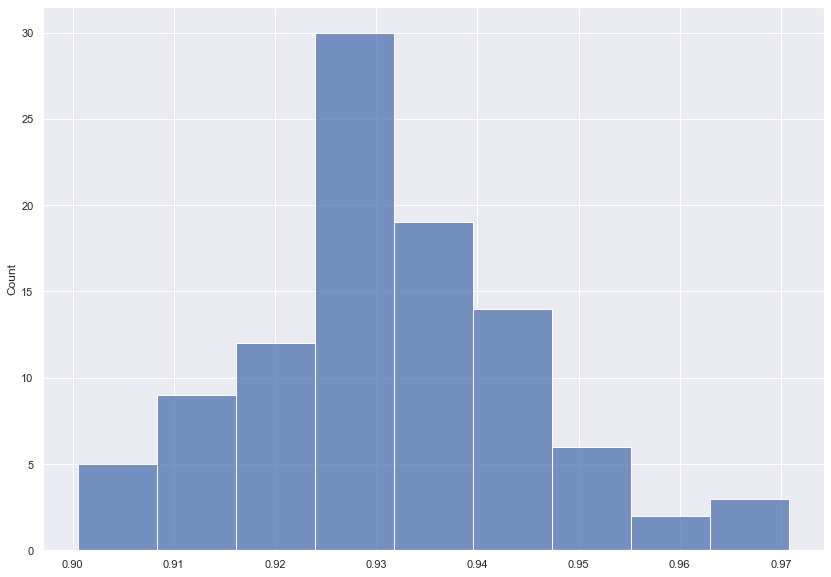

In [22]:
sns.histplot(result)

## Perceptron 

In [23]:
clf = Perceptron(tol=1e-3, random_state=0)

In [24]:
clf.fit(X_train, y_train)

Perceptron()

In [25]:
clf.score(X_test, y_test)

0.8888888888888888

In [26]:
percep = []
for i in range(0,100):
    X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.3, train_size=0.7, shuffle=True)
    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)
    percep.append(score)
    
perResult = np.array(percep)

In [27]:
print('The average accuracy is {}%'.format(round(perResult.mean(),4)*100))
print('The average standard deviation is {}'.format(round(perResult.std(),4)*100))

The average accuracy is 85.64%
The average standard deviation is 11.200000000000001


<AxesSubplot:ylabel='Count'>

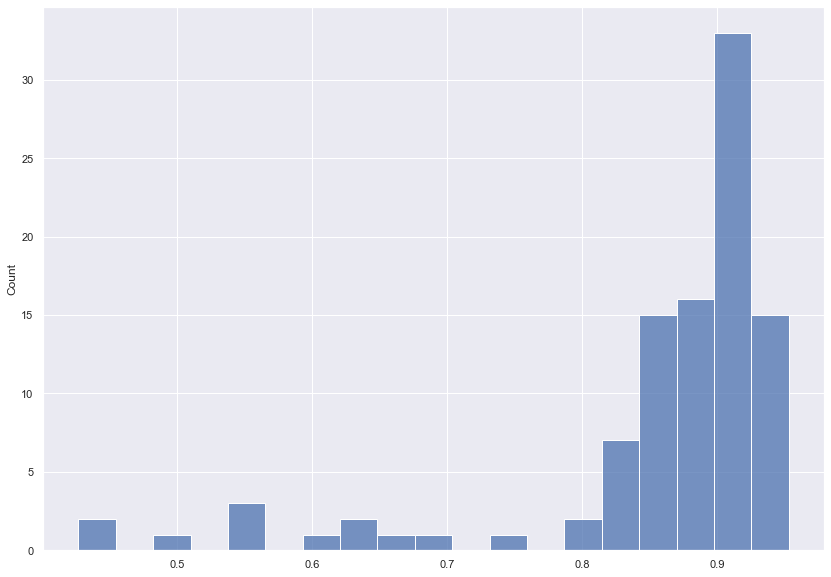

In [28]:
sns.histplot(perResult)

## Support Vector Machines

In [29]:
clf = svm.SVC()
clf.fit(X_train, y_train)

SVC()

In [30]:
clf.predict(X_test)

array([1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1])

In [31]:
print(np.array(y_test))

[1 0 1 1 0 1 1 1 0 1 1 1 1 0 1 0 1 1 0 1 0 1 0 1 0 0 1 0 0 1 0 1 0 0 1 1 1
 1 0 1 1 1 1 1 0 1 0 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 0 0 1 1 1
 1 0 1 1 1 0 0 0 1 1 1 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 0 0 1 0
 0 0 0 1 1 0 1 1 1 1 1 1 0 1 0 1 0 1 0 0 1 1 0 1 0 0 1 1 1 0 1 1 1 1 1 1 0
 0 0 0 1 1 0 0 1 0 0 0 1 1 1 1 1 0 0 1 1 1 1 1]


In [32]:
x = ((clf.predict(X_test)-np.array(y_test))**2)
print(x)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [33]:
print('The number of errors in the predictions is {}.'.format(sum(x)))
print('The number of elements in the test dataset is {}.'.format(len(x)))

The number of errors in the predictions is 8.
The number of elements in the test dataset is 171.


In [34]:
testAccuracy = 1 - (sum(x)/len(x))
print('The accuracy of the Support Vector Machines model is {}%'.format(round(testAccuracy,4)*100))

The accuracy of the Support Vector Machines model is 95.32000000000001%


In [35]:
svmList = []
for i in range(0, 100):
    X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.3, train_size=0.7, shuffle=True)
    clf = svm.SVC()
    clf.fit(X_train, y_train)
    x = ((clf.predict(X_test)-np.array(y_test))**2)
    testAccuracy = 1 - (sum(x)/len(x))
    svmList.append(testAccuracy)

In [36]:
svmResult = np.array(svmList)

In [37]:
print('The average accuracy is {}%'.format(round(svmResult.mean(),4)*100))
print('The average standard deviation is {}%'.format(round(svmResult.std(),4)*100))

The average accuracy is 91.49000000000001%
The average standard deviation is 1.9300000000000002%


<AxesSubplot:ylabel='Count'>

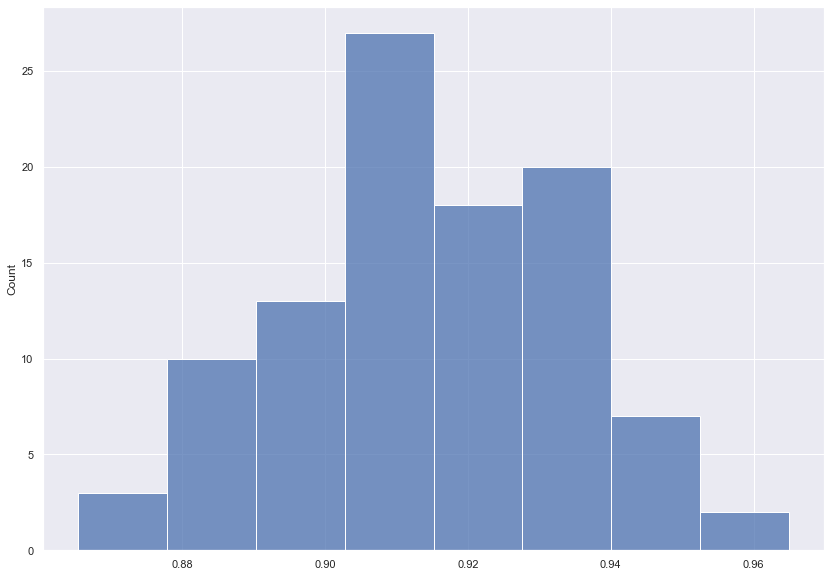

In [38]:
sns.histplot(svmResult)

## Decision Tree

In [39]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

In [40]:
clf.predict(X_test)

array([0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1])

In [41]:
x = ((clf.predict(X_test)-np.array(y_test))**2)
print(x)

[0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [42]:
print('The number of errors in the predictions is {}.'.format(sum(x)))
print('The number of elements in the test dataset is {}.'.format(len(x)))

The number of errors in the predictions is 10.
The number of elements in the test dataset is 171.


In [43]:
testAccuracy = 1 - (sum(x)/len(x))
print('The accuracy of the Decision Tree model is {}%'.format(round(testAccuracy,4)*100))

The accuracy of the Decision Tree model is 94.15%


In [44]:
dtList = []
for i in range(0, 100):
    X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.3, train_size=0.7, shuffle=True)
    clf = tree.DecisionTreeClassifier()
    clf = clf.fit(X_train, y_train)
    x = ((clf.predict(X_test)-np.array(y_test))**2)
    testAccuracy = 1 - (sum(x)/len(x))
    dtList.append(testAccuracy)

In [45]:
dtResult = np.array(dtList)

In [46]:
print('The average accuracy is {}%'.format(round(dtResult.mean(),4)*100))
print('The average standard deviation is {}%'.format(round(dtResult.std(),4)*100))

The average accuracy is 92.43%
The average standard deviation is 1.9800000000000002%


<AxesSubplot:ylabel='Count'>

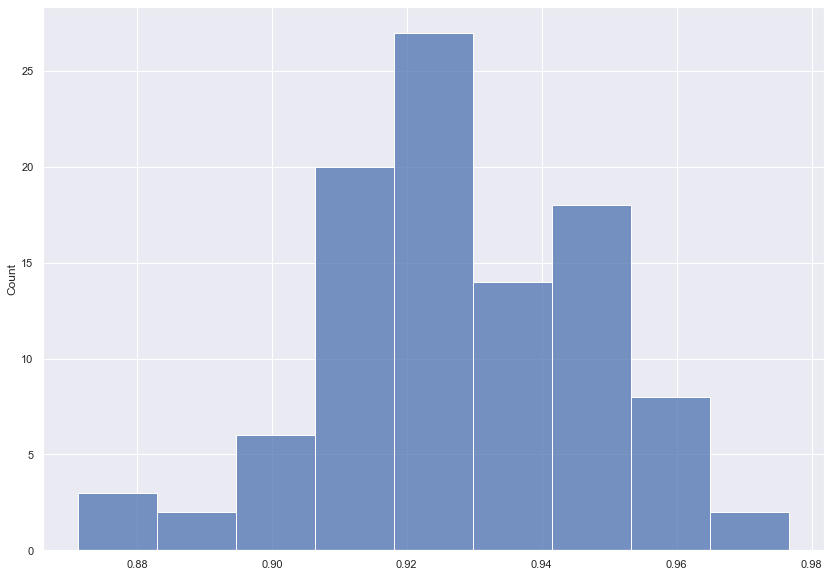

In [47]:
sns.histplot(dtResult)

The K nearest neighbours, Decision Tree and Support Vector Machines performed reasonably well and with almost identical accuracy. The Perceptron performed noticeably poorer, with a significantly larger standard deviation. While the study examined earlier had a lot of success with the Multilayer Perceptron, the standard Perceptron would require much adjustment before it could be considered reliable. 

## Synthetic data

The dataset could be extended using synthetic data to increase the size of the training set. More data points could refine the model's accuracy. In our previous investigations into machine learning algorithms on the Wisconsin dataset we used a 70/30 train/test split. A more precise determination of the accuracy of the algoritms could be determined with a larger test set but this would come at the expense of the training set. A larger overall dataset would help balance these two requirements.  
    
As the different attributes are linked to various degrees, the first step in generating a synthetic dataset is to examine in more detail the heatmaps created during our initial exploration. 

<AxesSubplot:>

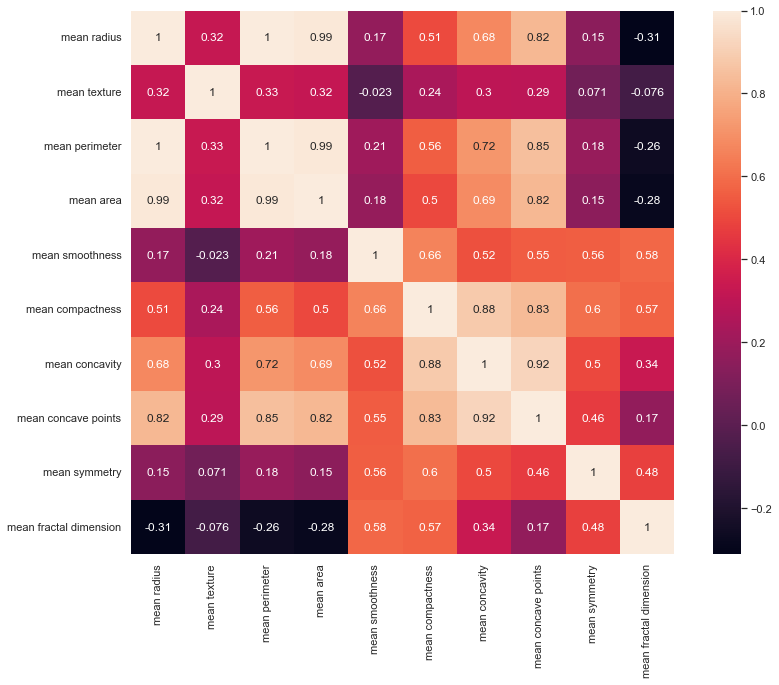

In [48]:
sns.heatmap(df.iloc[:,0:10].corr(), vmax=1, square=True, annot=True)

We can see near perfect correlation between mean radius, mean perimeter and mean area. This is to be expected and provides a relatively straightforward relationship to begin data generation. Our histogram of the mean radius distribution shows a relatively normally distributed set with a slight right skew. It would be adequately modelled using Numpy's random number generator function and normal method. We can use the mean and standard deviation of the diagnostic set as our parameters for the synthesised dataset. We can then use the resulting synthetic data to generate the perimeter and area data.

In [49]:
rng = np.random.default_rng()

In [50]:
#mean radius - normal distribution
rad = rng.normal(df.iloc[:,0].mean(), df.iloc[:,0].std(), 569)
print(rad)

[12.97664593 14.70302496 18.55332374  9.73168442 13.95568007  9.4234498
 17.44793394 16.46771741 10.61682768 19.18853993  9.08278224 20.36020454
 18.07921096 16.93340047 15.70252017 11.3598244  12.74354212  9.45007609
 14.29608927 18.26217319 14.99379897 11.34639273 13.78542968 16.71713406
 16.06157531 17.15700337 20.60516356 13.12911046 12.13789169 19.40424969
 12.76078007 13.40849635 13.17258988 12.45640422  9.96222169  9.88906642
 14.69571463  9.29725719 18.93664016 15.91503466 12.24483053 10.36189886
 12.08187907 16.74788485 13.28629632 14.43187005 12.64882154 20.33279725
 13.44535026 13.97713356 16.88562112 16.53449193 10.74013229 16.93027802
 16.59072166 13.88344189 18.96216563 19.1747702   9.38988499 13.64152365
 13.02256424 13.90038109 12.03901346 14.25591357 16.52093966 12.8468319
 12.78849702 20.85496876 14.53320645 10.00137561 10.68553632 15.09345723
 13.52972995 15.6172099  11.58390128 11.30393393  9.99081828 13.12127508
 15.00259446 10.43864608 13.10216313 13.55389983 15.1

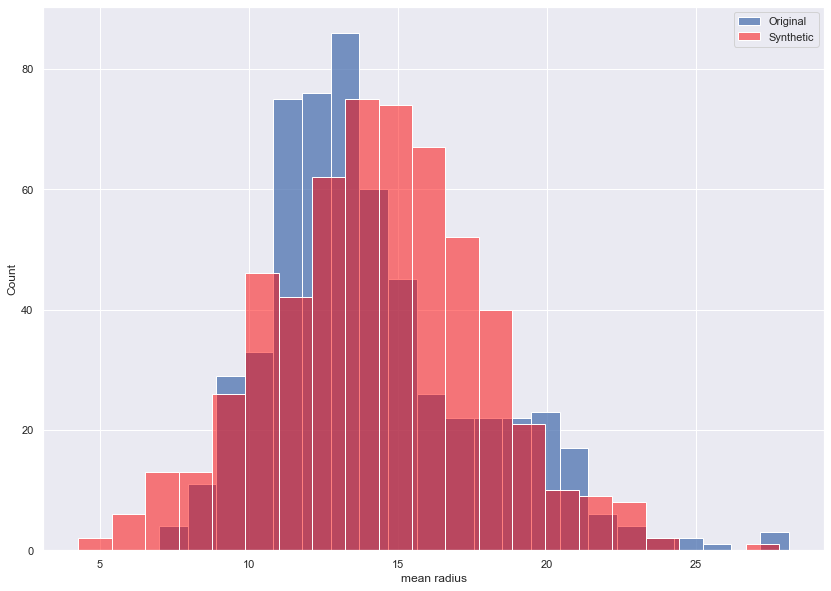

In [51]:
plt.figure()
sns.histplot(df.iloc[:,0])
sns.histplot(rad, color='red', alpha=0.5)
plt.legend(['Original', 'Synthetic'])

By using the histogram to compare the distributions of the original and synthetic data, we can see if the synthetic data is a reasonable extension of the original. Small variations in the data may cause large differences as we generate more sets of data from this first synthetic set. The histograms will be a good guide to see if a scaling or position factor needs to be added to it. In our case it appears to match the original set of data well. The mean of the synthetic is slightly higher but not excessively so. We can use a line of best fit to determine the equation of the relationship between the radius and the perimeter and the area.

Best fit line is y = 6.880400289601542x + (-5.232388786540269)


<AxesSubplot:xlabel='mean radius', ylabel='mean perimeter'>

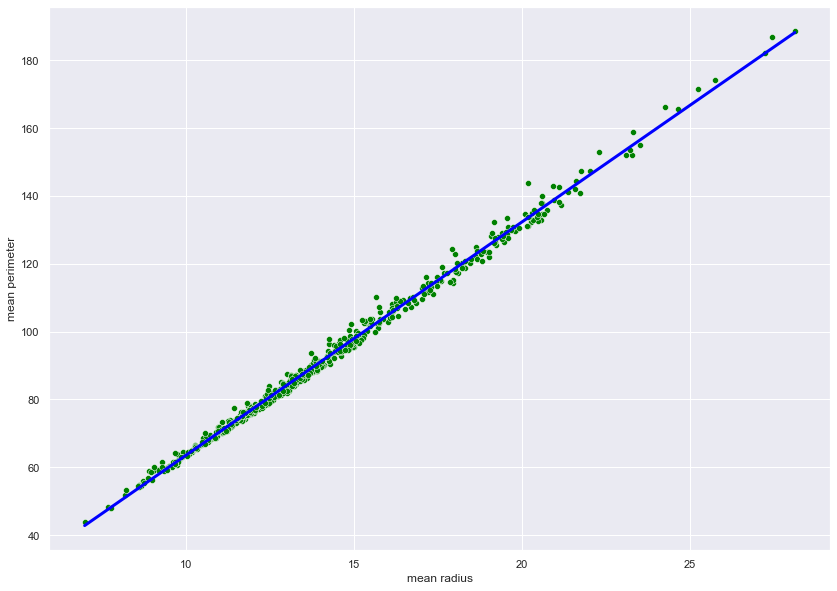

In [52]:
#mean perimeter synthetic data
#https://www.statology.org/line-of-best-fit-python/
x = np.array(df.iloc[:,0])
y = np.array(df.iloc[:,2])

a, b = np.polyfit(x, y, 1)
print('Best fit line is y = {}x + ({})'.format(a,b))

sns.scatterplot(x=df.iloc[:,0], y=df.iloc[:,2], color='green')

sns.lineplot(x=x, y=a*x+b, color='blue', linestyle='-', linewidth=3)

In [53]:
#synthetic perimeter data
per = rad*a + b
print(per)

[ 84.0521296   95.93030839 122.42190524  61.72549551  90.78827638
  59.60471792 114.81638094 108.07209888  67.81563543 126.79244688
  57.26078877 134.85396845 119.15981957 111.27618472 102.80723556
  72.92775034  82.44828209  59.78791749  93.13042797 120.41867294
  97.93094998  72.83533503  89.61688561 109.78818525 105.27767865
 112.81466218 136.53938456  85.1011466   78.28116473 128.27661642
  82.5668861   87.0234334   85.40030247  80.47265838  63.31168424
  62.8083467   95.88001041  58.73646227 125.05927564 104.26942027
  79.01694672  66.0616231   77.89577549 109.99976296  86.18264828
  94.06465407  81.79656657 134.66539533  87.27700301  90.93588498
 110.94744364 108.53153425  68.66402051 111.254701   108.9184173
  90.29124884 125.23490114 126.69770566  59.37377861  88.62675445
  84.36806597  90.40779728  77.60084292  92.85400308 108.4382892
  83.15895712  82.75758983 138.25814432  94.76188907  63.58107883
  68.28837841  98.61663872  87.85756909 102.22026674  74.46948895
  72.5432015

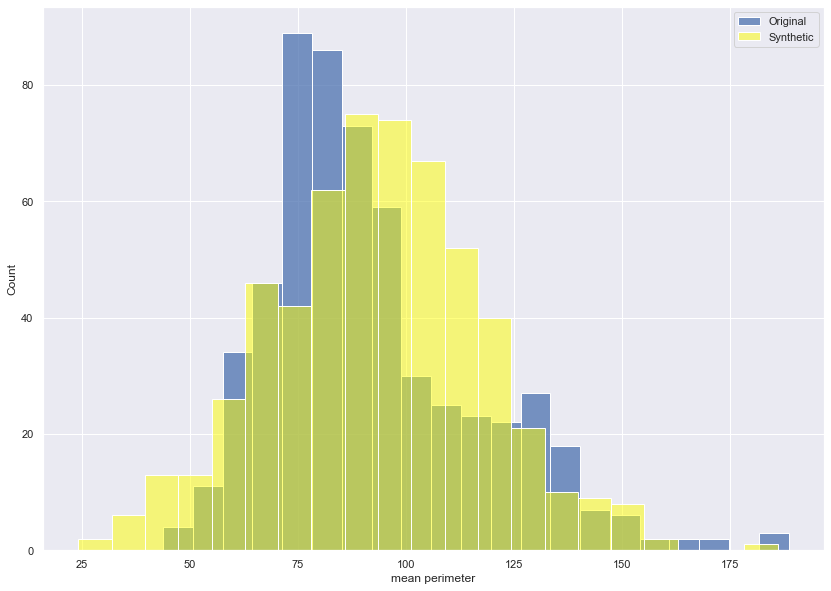

In [54]:
plt.figure()
sns.histplot(df.iloc[:,2])
sns.histplot(per, color='yellow', alpha=0.5)
plt.legend(['Original', 'Synthetic'])

Best fit line is y = 98.59821921514536x + (-738.0367041957494)


<AxesSubplot:xlabel='mean radius', ylabel='mean area'>

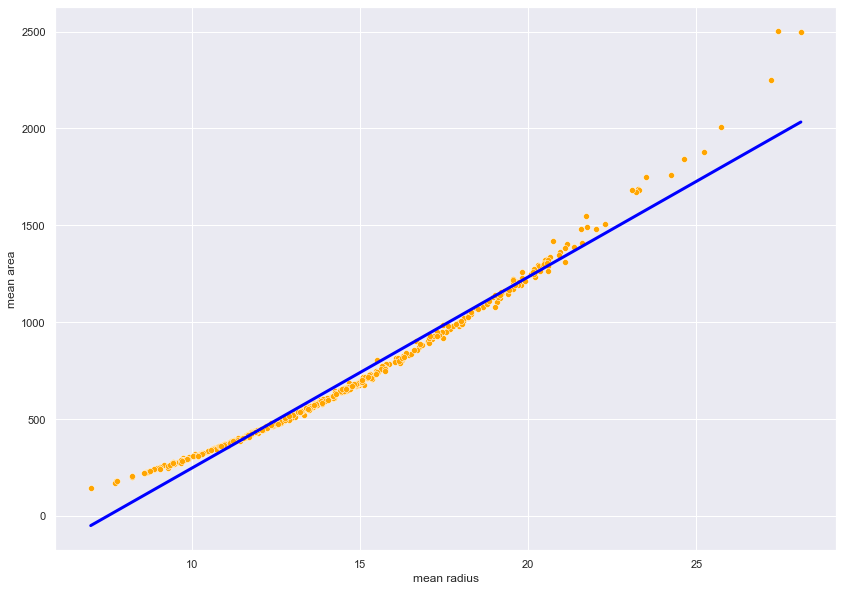

In [55]:
#mean area synthetic data
x = np.array(df.iloc[:,0])
y = np.array(df.iloc[:,3])

c, d = np.polyfit(x, y, 1)
print('Best fit line is y = {}x + ({})'.format(c,d))

sns.scatterplot(x=df.iloc[:,0], y=df.iloc[:,3], color='orange')

sns.lineplot(x=x, y=c*x+d, color='blue', linestyle='-', linewidth=3)

As the area isn't quite as well correlated, we can add a small amount of noise to represent the deviation from line. We can choose the standard deviation of the noise value by trial and error, seeing the effect it has on the correlation calculated for the synthetic data.

In [56]:
#synthetic area data
noise = rng.normal(0, 90, 569)
area = abs(rad*c + d + noise)
print(df.iloc[:,3])
print(area)

0      1001.0
1      1326.0
2      1203.0
3       386.1
4      1297.0
        ...  
564    1479.0
565    1261.0
566     858.1
567    1265.0
568     181.0
Name: mean area, Length: 569, dtype: float64
[ 481.44393661  721.84523337 1149.35525168  260.35438368  712.02205291
  212.20441597 1024.2947612   908.3379033   267.9781409  1355.34309566
  185.41974091 1133.71858479  921.2068199   924.60843976  642.66676781
  270.77992265  455.6832388    67.72945821  550.83915665  933.80045335
  598.80373485  462.11373519  693.57609656  841.90252246  827.50717914
  913.13391581 1197.60702548  457.51370701  456.35027311 1029.76778101
  430.54393426  584.83259184  597.3664979   358.31982233  368.56022837
  159.59166396  630.18433532  140.92099005 1195.43357081  839.42399754
  533.69064199  323.10148372  501.13411875  803.02802903  537.46136512
  571.96440598  515.38011527 1268.60658687  554.7840965   788.34322122
  957.71758065  655.23066318  347.67267603  801.20695645  865.56202071
  639.54045225 1290.

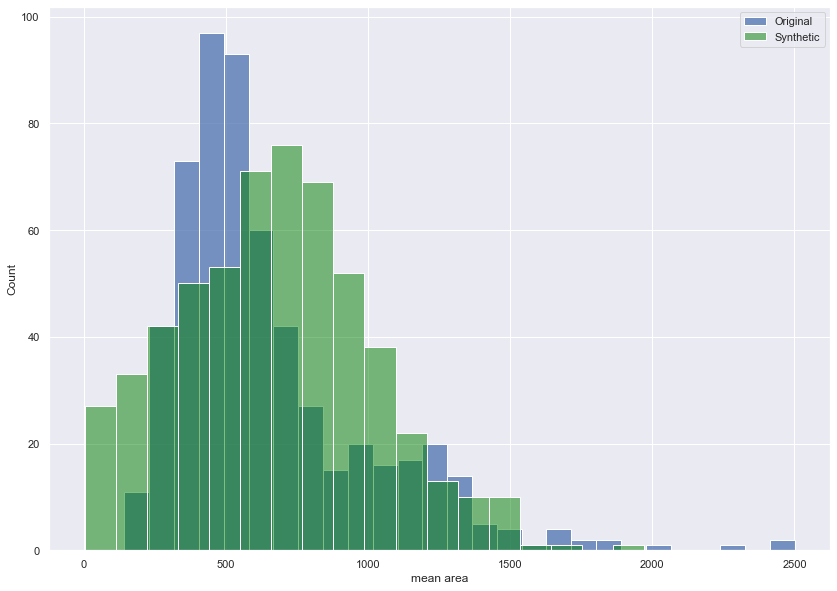

In [57]:
plt.figure()
sns.histplot(df.iloc[:,3])
sns.histplot(area, color='green', alpha=0.5)
plt.legend(['Original', 'Synthetic'])

We can also see that mean concave points correlate strongly with the mean radius, perimeter and area. If we can determine the approximate relationship between concave points, we can model this attribute based on our radius synthetic data.

Best fit line is y = 0.009056754948745952x + (-0.07902827350772049)


<AxesSubplot:xlabel='mean radius', ylabel='mean concave points'>

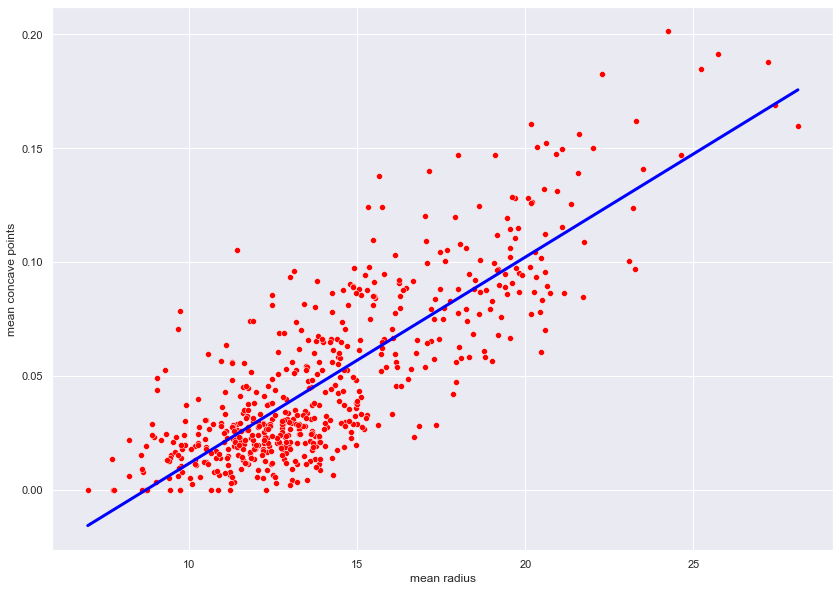

In [58]:
x = np.array(df.iloc[:,0])
y = np.array(df.iloc[:,7])

e, f = np.polyfit(x, y, 1)
print('Best fit line is y = {}x + ({})'.format(e,f))

sns.scatterplot(x=df.iloc[:,0], y=df.iloc[:,7], color='red')

sns.lineplot(x=x, y=e*x+f, color='blue', linestyle='-', linewidth=3)

So we have established an approximate linear relationship between the radius and concave points. We can use this to generate the synthetic concave points data. We will also need to add a noise variable as we do not want the data to correlate exactly. We need to keep the correlation at about 0.82.

In [59]:
#mean concave points synthetic data
noise = rng.normal(0, 0.02, 569)
conp = abs(rad*e + f + noise)
print(conp)

[0.0895075  0.06365642 0.10759749 0.00138359 0.06899459 0.01831044
 0.06200603 0.10259938 0.01200092 0.07166849 0.01158239 0.06835847
 0.07860724 0.07066875 0.05763465 0.03143778 0.03316367 0.02899005
 0.0333149  0.10261692 0.05356769 0.00091469 0.05345721 0.03790404
 0.0887475  0.09951566 0.11895836 0.05977456 0.00048414 0.0822227
 0.05153814 0.01188481 0.05085926 0.05024833 0.04316465 0.03148138
 0.05748589 0.01938309 0.12523093 0.08998142 0.02846346 0.00246547
 0.04868853 0.05928588 0.05434162 0.04906619 0.03375827 0.09315159
 0.02049556 0.04943957 0.09406885 0.06854388 0.04974086 0.09061902
 0.05253235 0.03097963 0.06683044 0.09059557 0.00568972 0.04594497
 0.02561882 0.04309536 0.03843917 0.05943999 0.07995243 0.0267735
 0.03891652 0.13043423 0.0555831  0.01335571 0.01044499 0.08323784
 0.03918356 0.05210455 0.01759872 0.01111601 0.01138325 0.06103565
 0.04326886 0.04277703 0.05379343 0.02860958 0.04762742 0.1089539
 0.11285284 0.06354359 0.06933716 0.03504348 0.10087541 0.0421802

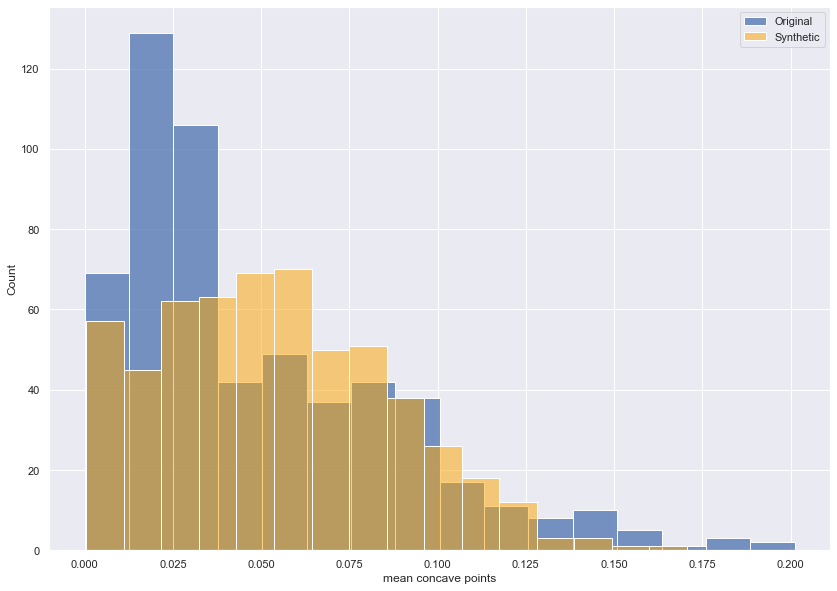

In [60]:
plt.figure()
sns.histplot(df.iloc[:,7])
sns.histplot(conp, color='orange', alpha=0.5)
plt.legend(['Original', 'Synthetic'])

When we examine concave points relationship with other attributes, we find that compactness and concavity are highly correlated with it. We will use this as the basis of the synthetic data for these two attributes.

Best fit line is y = 1.1312194763444867x + (0.049002693608555456)


<AxesSubplot:xlabel='mean concave points', ylabel='mean compactness'>

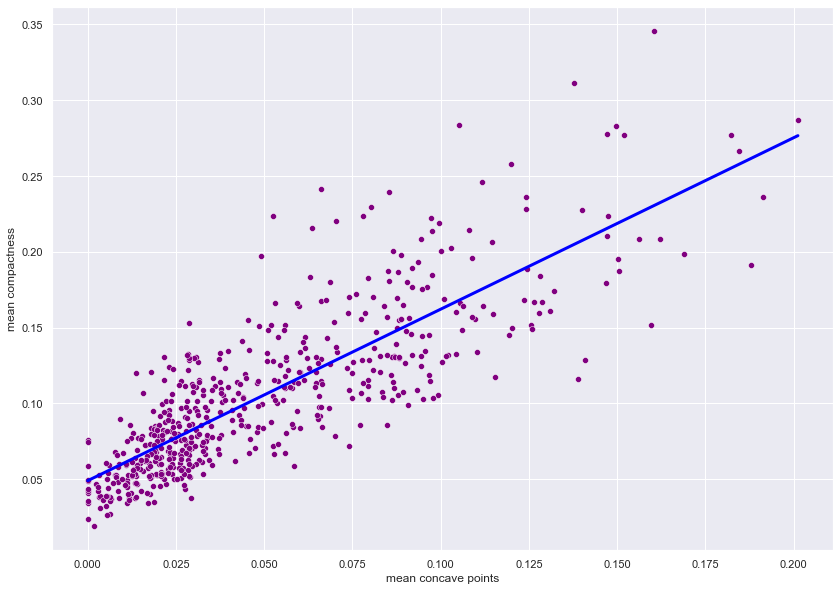

In [61]:
#mean compactness synthetic data
x = np.array(df.iloc[:,7])
y = np.array(df.iloc[:,5])

g, h = np.polyfit(x, y, 1)
print('Best fit line is y = {}x + ({})'.format(g,h))

sns.scatterplot(x=df.iloc[:,7], y=df.iloc[:,5], color='purple')

sns.lineplot(x=x, y=g*x+h, color='blue', linestyle='-', linewidth=3)

In [62]:
#compactness
noise = rng.normal(0, 0.027, 569)
comp = conp*g + h + noise
print(comp)

[ 1.63713136e-01  1.39257762e-01  1.40949863e-01  8.34705522e-02
  1.25691592e-01  2.25088656e-02  1.12010388e-01  1.41015652e-01
  1.05194296e-01  9.65334637e-02  4.75398105e-02  1.23668038e-01
  1.47090670e-01  8.61801388e-02  1.19539121e-01  7.20736225e-02
  6.43423334e-02  1.00002634e-01  1.35507998e-01  1.03982311e-01
  1.18149798e-01  3.27159727e-02  1.46172817e-01  8.12410872e-02
  1.36707605e-01  1.73561793e-01  1.78963282e-01  1.09178128e-01
  6.72799065e-03  1.65213605e-01  8.67420291e-02  7.79978247e-02
  1.05747913e-01  3.04316615e-02  1.01126992e-01  6.07280026e-02
  1.38295385e-01  1.06504349e-01  1.39446082e-01  1.39332641e-01
  9.12350426e-02  2.73612615e-02  1.25657051e-01  1.17102305e-01
  1.51934876e-01  1.35038190e-01  8.57355668e-02  1.11757271e-01
  5.88195948e-02  1.06854863e-01  1.58051913e-01  1.23637807e-01
  6.97586005e-02  1.55079626e-01  7.57789768e-02  7.66598141e-02
  9.96781145e-02  1.85543749e-01  1.50887270e-02  1.23689435e-01
  7.78844484e-02  1.41647

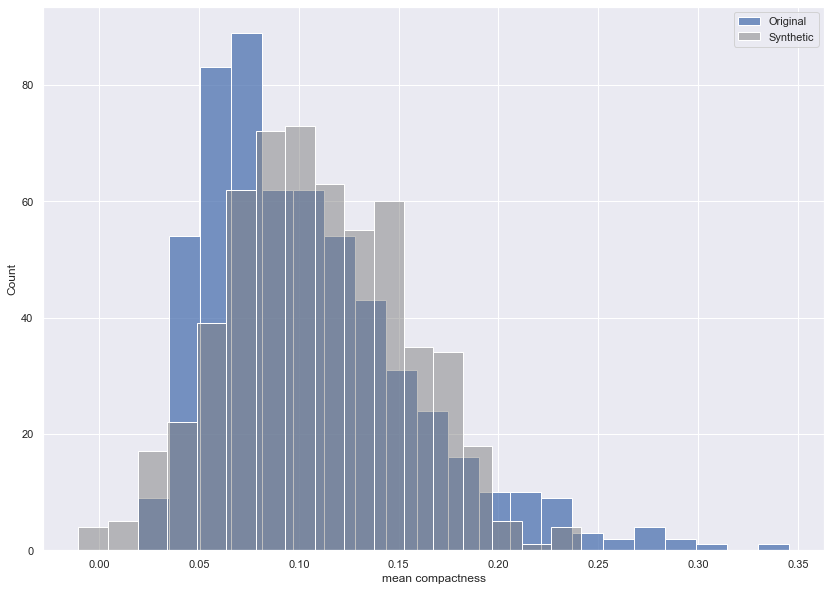

In [63]:
plt.figure()
sns.histplot(df.iloc[:,5])
sns.histplot(comp, color='grey', alpha=0.5)
plt.legend(['Original', 'Synthetic'])

Similarly we could generate data for concavity from mean concave points. Smoothness is not quite as well correlated with other attributes. It is aligned most with compactness. Synthetic data could be derived using compactness and a high level of noise. Symmetry and fractal dimension are less correlated again but could be derived from the smoothness. Texture appears to be uncorrelated to all other attributes and would probably be best modeled as an independent random distribution. Mean texture is normally distributed so this would be straightforward to model using the mean and standard deviation from the original dataset. While we focused on the mean values here, the same approach can be applied to the standard error and max values.

Using the five attributes we have generated synthetic data for, we can now create a heatmap to see if we have been able to maintain the relationships between the variables.

In [64]:
synData = np.transpose([rad, per, area, comp, conp])

In [65]:
#generate a dataframe using the numpy arrays created above
synDataDf = pd.DataFrame(synData, columns=['mean radius', 'mean perimeter', 'mean area', 'mean compactness', 'mean concave points'])

In [66]:
synDataDf

,mean radius,mean perimeter,mean area,mean compactness,mean concave points
0,12.976646,84.052130,481.443937,0.163713,0.089508
1,14.703025,95.930308,721.845233,0.139258,0.063656
2,18.553324,122.421905,1149.355252,0.140950,0.107597
3,9.731684,61.725496,260.354384,0.083471,0.001384
4,13.955680,90.788276,712.022053,0.125692,0.068995
...,...,...,...,...,...
564,15.858753,103.882180,696.357861,0.150570,0.089467
565,19.546591,129.255979,1125.911548,0.241322,0.119280
566,12.242409,79.000289,475.833714,0.109734,0.038283
567,16.885917,110.949478,876.862417,0.188053,0.107517


Text(0.5, 1.0, 'Synthetic dataset')

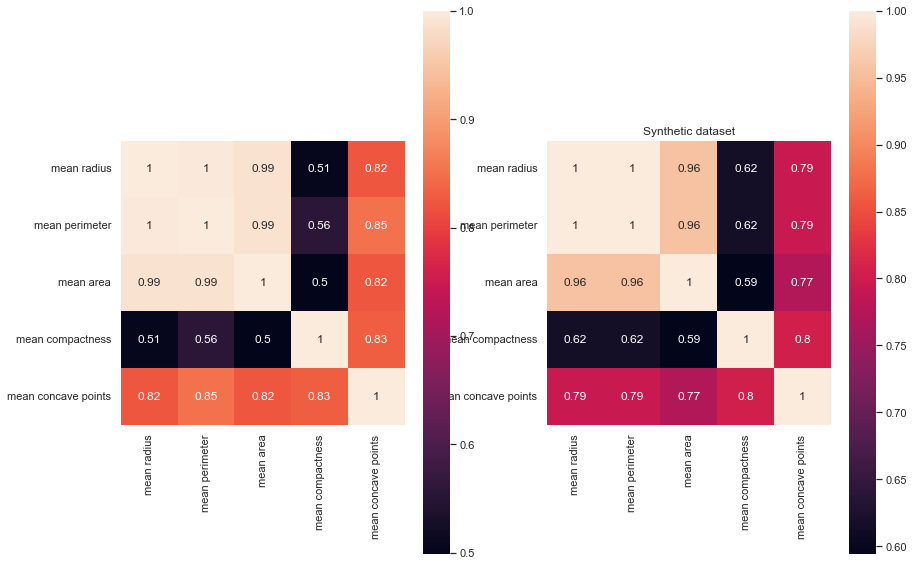

In [67]:
#https://stackoverflow.com/questions/50947776/plot-two-seaborn-heatmap-graphs-side-by-side

fig, (ax1, ax2) = plt.subplots(1,2)

sns.heatmap(df.iloc[:,[0,2,3,5,7]].corr(), vmax=1, square=True, annot=True, ax=ax1)
sns.heatmap(synDataDf.iloc[:,0:10].corr(), vmax=1, square=True, annot=True, ax=ax2)
plt.title('Synthetic dataset')

The correlation in the synthetic data is quite close to the original data. This should prove useful data to train a machine learning model on. It may be a consideration to increase the noise in certain variables to create more variety in the dataset. As perimeter and area are very closely linked to radius, they shouldn't be adjusted. For those three attributes, an increase in the standard variation when generating radius synthetic data can increase variation to the desired level. To generate the target data, whether the tumour is benign or malignant, one approach could be to use z-scores with the scipy.stats package. By calculating the z-scores for each synthetic sample using the original benign mean and calculating a second time using the malignant mean for each attribute, we can begin to see which is more likely. A lower z-score for benign means the value is closer to the benign mean and therefore more likely. By adding up the absolute values of the z-scores for all the attributes of the sample, we can determine if it should be marked as benign or malignant by which calculation has the lowest total.

## References

UCI Machine Learning (2017) Breast Cancer Wisconsin (Diagnostic) Data Set. Available at: https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data?resource=download (Accessed: 6 December 2022)  
  
Sinha, S. (2017) Visualising the Breast Cancer Wisconsin Data Set. Available at: https://www.kaggle.com/code/djokester/visualising-the-breast-cancer-wisconsin-data-set/notebook (Accessed: 7 December 2022)  
  
Scikit-learn.org (2022). sklearn.datasets.load_breast_cancer. Available at: https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html (Accessed 6 December 2022)  
  
Dua, D. and Graff, C. (2019). UCI Machine Learning Repository [http://archive.ics.uci.edu/ml]. Irvine, CA: University of California, School of Information and Computer Science.  
  
Abien Fred M. Agarap. 2018. On breast cancer detection: an application of machine learning algorithms on the wisconsin diagnostic dataset. In Proceedings of the 2nd International Conference on Machine Learning and Soft Computing (ICMLSC '18). Association for Computing Machinery, New York, NY, USA, 5–9. https://doi.org/10.1145/3184066.3184080  
  
R. Fitrah Umami and R. Sarno, "Analysis of Classification Algorithm for Wisconsin Diagnosis Breast Cancer Data Study," 2020 International Seminar on Application for Technology of Information and Communication (iSemantic), 2020, pp. 464-469, doi: 10.1109/iSemantic50169.2020.9234295.  
  
Borges, Lucas. (2015). Analysis of the Wisconsin Breast Cancer Dataset and Machine Learning for Breast Cancer Detection. 
  
Scikit-learn.org (2022) Support Vector Machines. Available at: https://scikit-learn.org/stable/modules/svm.html (Accessed: 20 December 2022)  
  
Scikit-learn.org (2022) Decision Tree. Available at: https://scikit-learn.org/stable/modules/tree.html# (Accessed: 20 December 2022)  
  
StackOverflow.com (2018) Plot two seaborn heatmap graphs side by side. Available at: https://stackoverflow.com/questions/50947776/plot-two-seaborn-heatmap-graphs-side-by-side (Accessed: 20 December 2022)  
  
Statology.com (2021) How to Plot Line of Best Fit in Python. Available at: https://www.statology.org/line-of-best-fit-python/ (Accessed on: 15 January 2022)